# Columbia University
# Your Full name : Zack Wang
# Link to your Public Github repository with Final report  : https://github.com/Zirui997/ML


### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
whr_df = pd.read_csv('data/WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [ ]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes


Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

In [ ]:
# Your answer:  y_train.astype('category').cat.codes - This part converts the y_train into a series of categorical data type
#. code atrtribute provides a numerical representation of each unique category in the series. It assigns the unique intenger code from starting from 0

<h3> Add new data

In [ ]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("data/newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [ ]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.
# Checking for the common countries
common_countries = list(set(X_train['country']) & set(countrydata['country_name']))

X_train = pd.merge(X_train, countrydata, left_on='country', right_on='country_name', how='left')
X_test = pd.merge(X_test, countrydata, left_on='country', right_on='country_name', how='left')


In [ ]:
X_train.head(1)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,Madagascar,25570895.0,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


## 1.  EDA

In [ ]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
country_name                      object
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [ ]:
## Your answer: The output is giving the overview of the structure of the Daframe. It tells what kind of data each column holds, which is important
##for analysis and preprocessing.

Find out the number and percentage of missing values in the table per column

In [ ]:
# Your code here:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    return mis_val_table_ren_columns

missing_values_table(X_train)

,Missing Values,% of Total Values
population_below_poverty_line,16,16.8
life_expectancy,7,7.4
expected_years_of_schooling,7,7.4
mean_years_of_schooling,7,7.4
gni,7,7.4
country_name,6,6.3
population,6,6.3
hdi,6,6.3


Plot the frequency distribution / histogram of some of the numerical features that you think are important

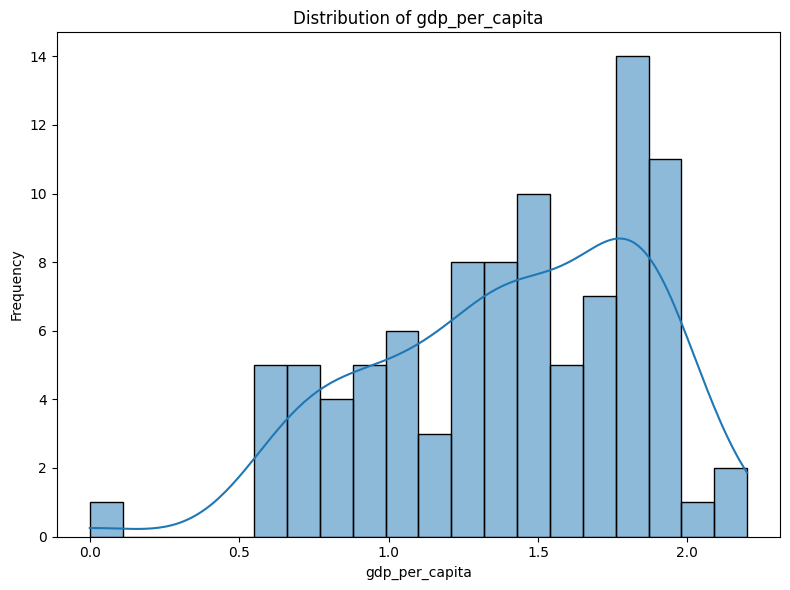

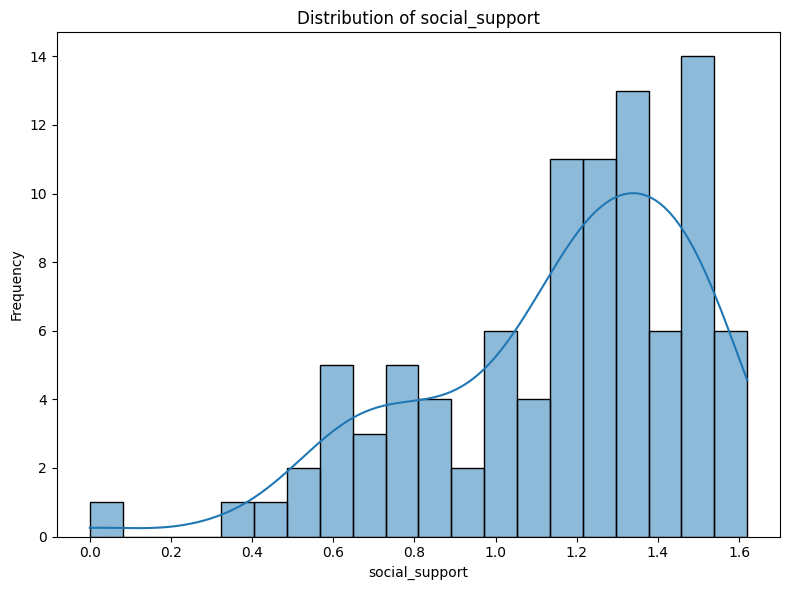

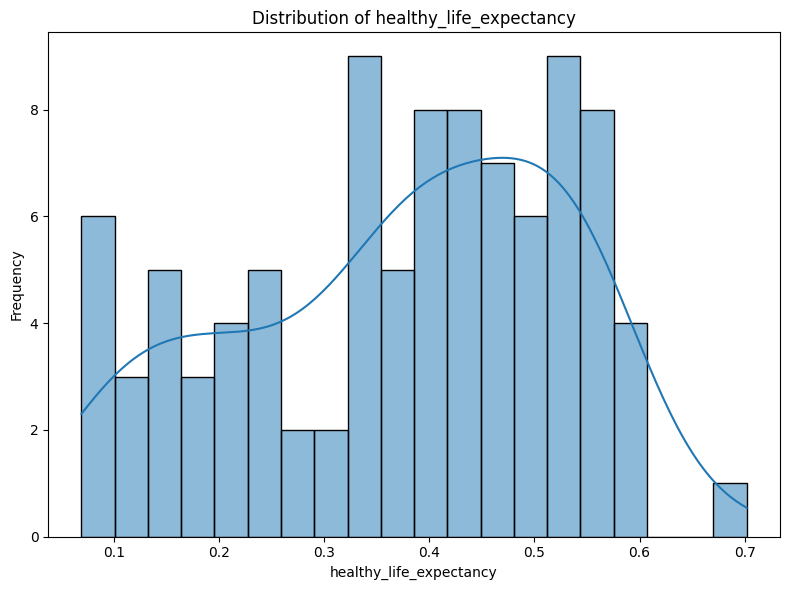

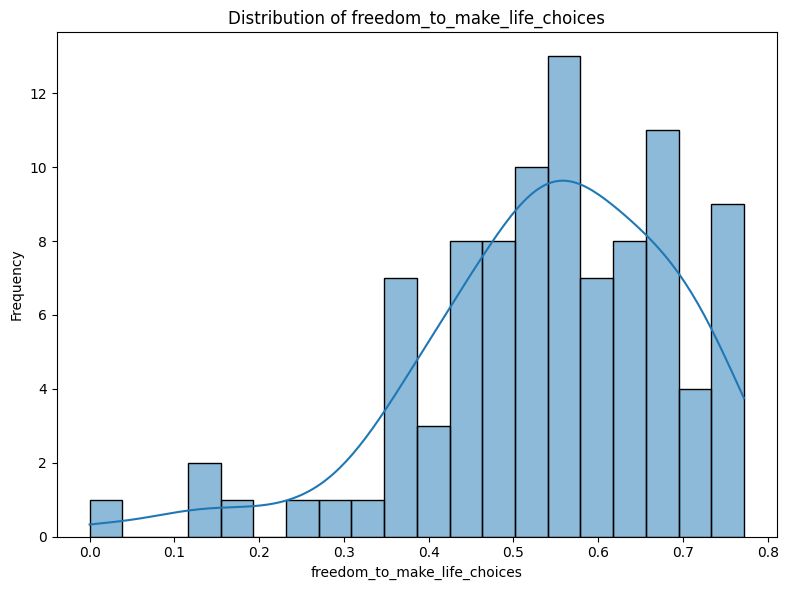

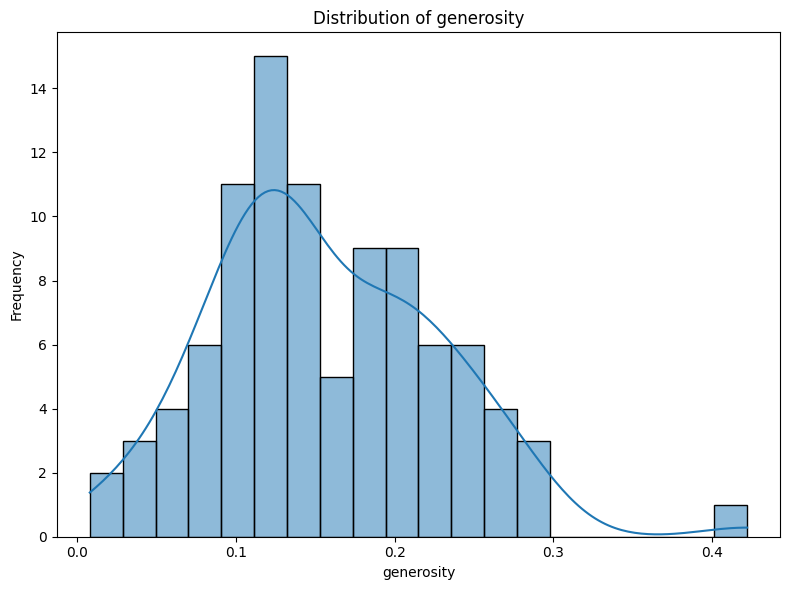

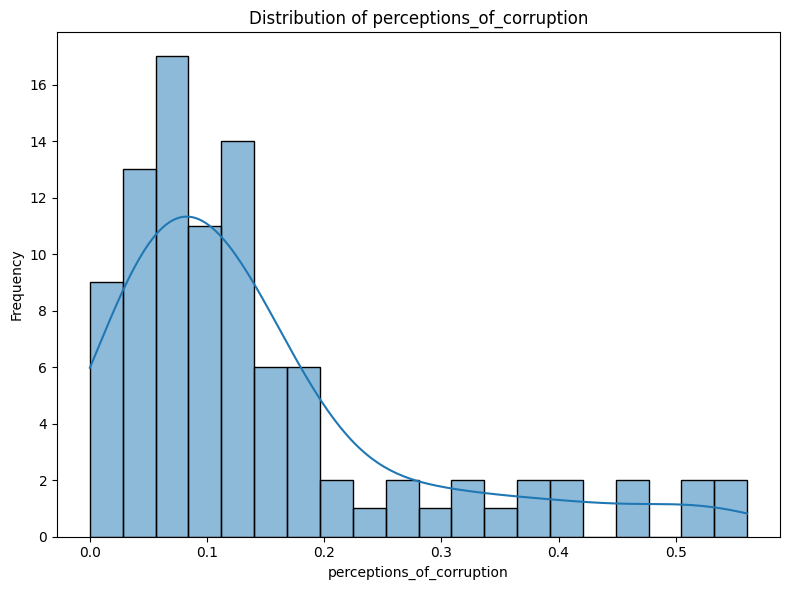

In [ ]:
# Your plotting code here:
import matplotlib.pyplot as plt
import seaborn as sns

# Select important numerical features
important_features = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                      'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']

# Plot histograms for selected features
for feature in important_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(X_train[feature], bins=20, kde=True)  # Use histplot from seaborn
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Plot the categorical variables and their distribution

<ipython-input-17-4c897aced074>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X_train['region'], order=X_train['region'].value_counts().index, palette="viridis")


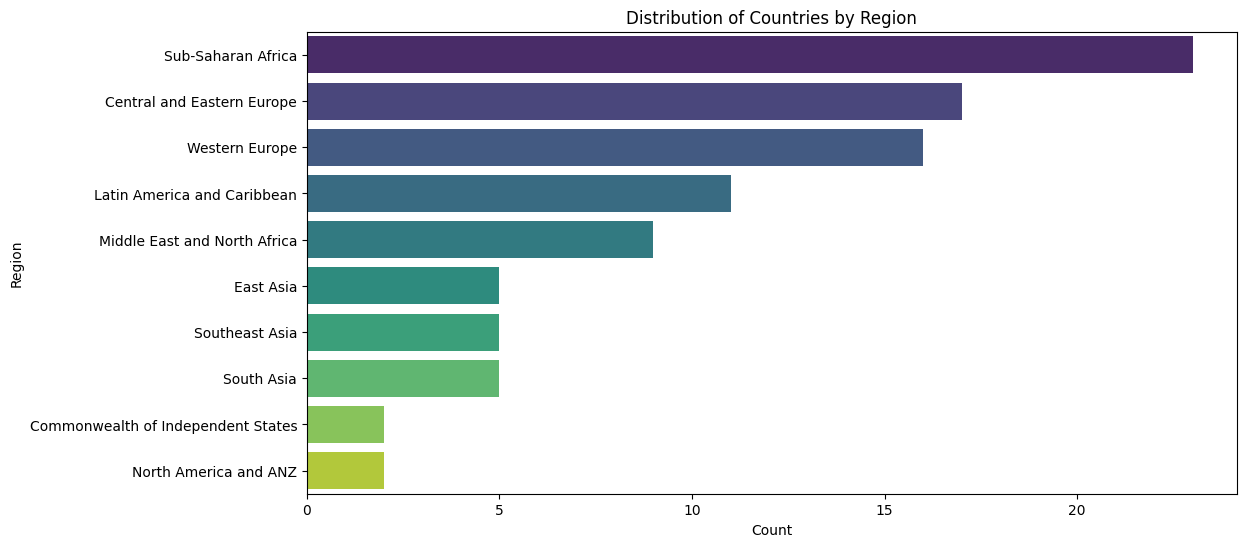

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'region'
plt.figure(figsize=(12, 6))
sns.countplot(y=X_train['region'], order=X_train['region'].value_counts().index, palette="viridis")
plt.title("Distribution of Countries by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

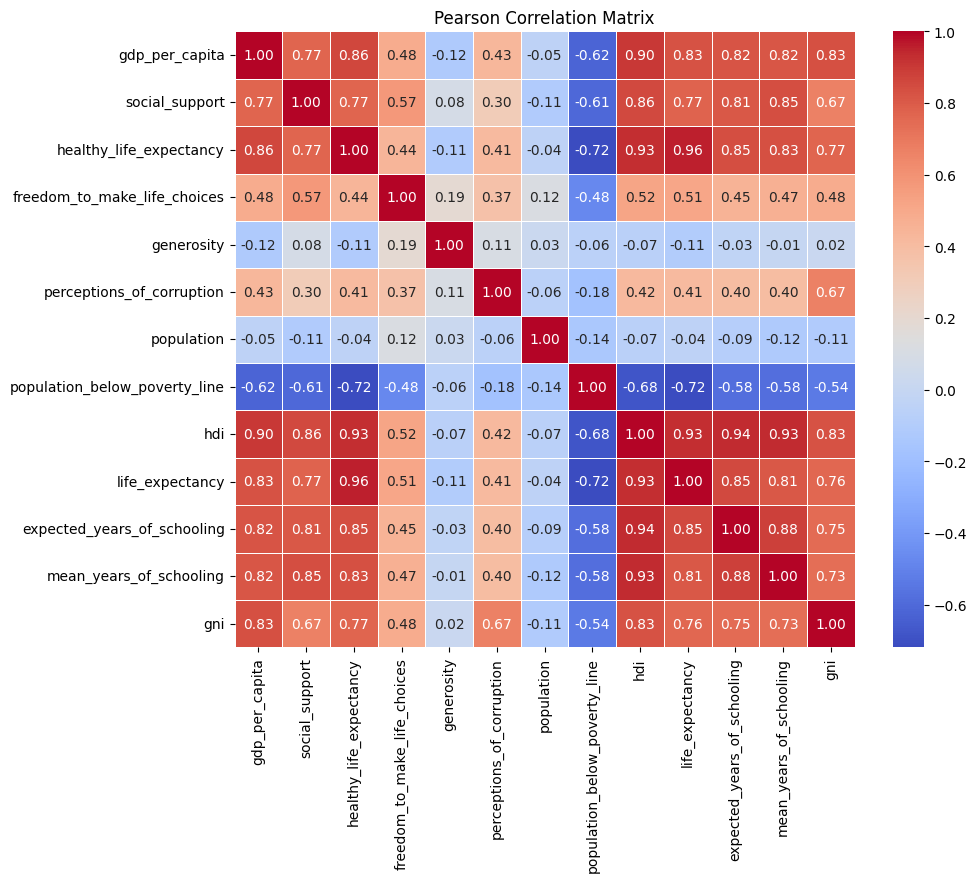

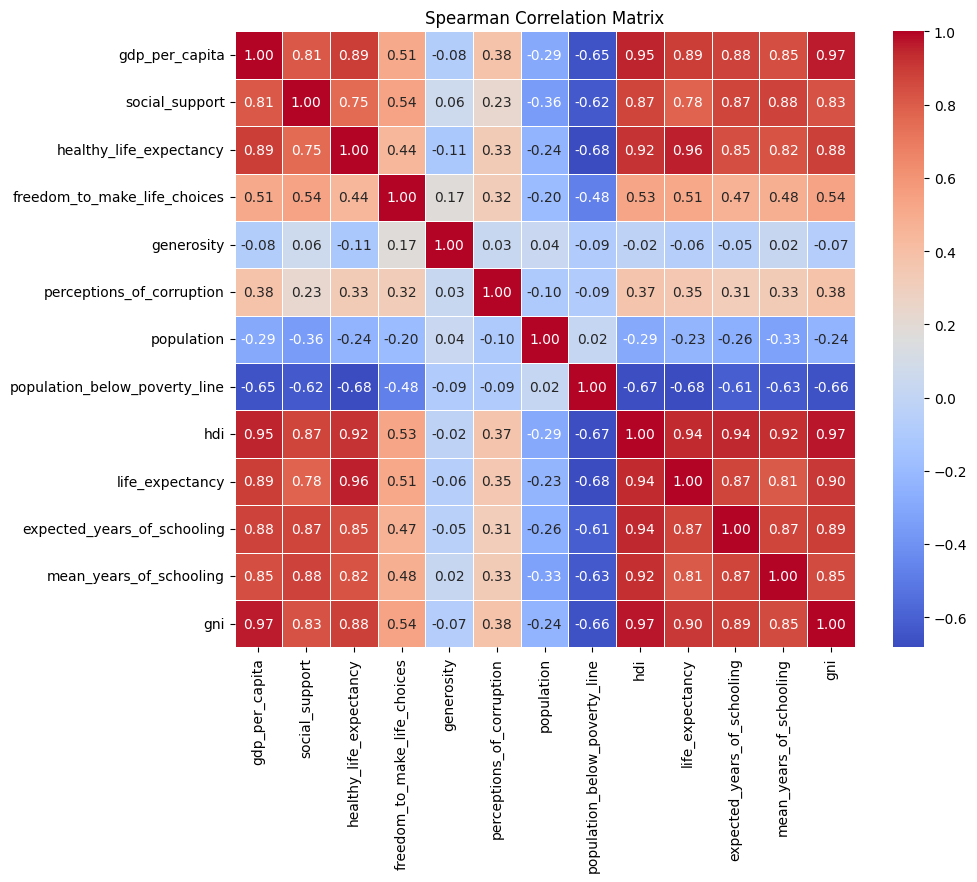

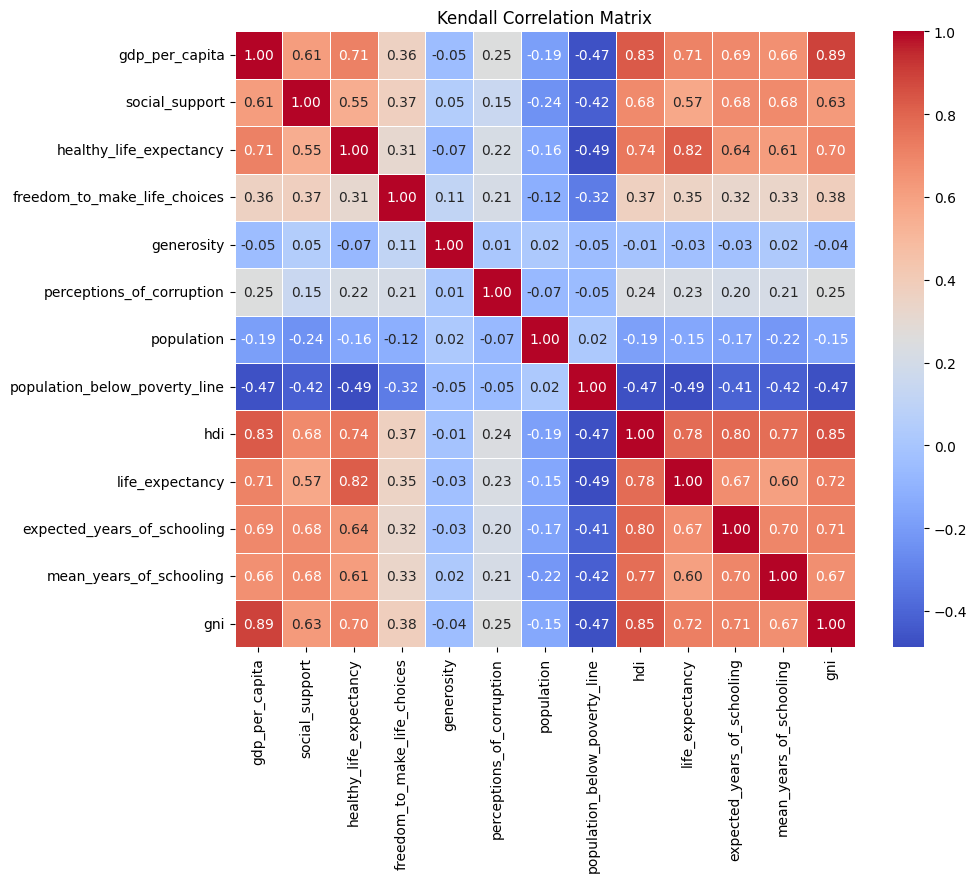

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for correlation analysis
num_features = X_train.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrices
pearson_corr = num_features.corr(method='pearson')
spearman_corr = num_features.corr(method='spearman')
kendall_corr = num_features.corr(method='kendall')

# Function to plot correlation heatmap
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot heatmaps
plot_correlation_heatmap(pearson_corr, "Pearson Correlation Matrix")
plot_correlation_heatmap(spearman_corr, "Spearman Correlation Matrix")
plot_correlation_heatmap(kendall_corr, "Kendall Correlation Matrix")


Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

                               gdp_per_capita  social_support  \
gdp_per_capita                       1.000000        0.769394   
social_support                       0.769394        1.000000   
healthy_life_expectancy              0.860164        0.771294   
freedom_to_make_life_choices         0.483145        0.571646   
generosity                          -0.115580        0.084327   
perceptions_of_corruption            0.432076        0.301807   
population                          -0.045583       -0.109651   
population_below_poverty_line       -0.620790       -0.605304   
hdi                                  0.902386        0.855297   
life_expectancy                      0.830886        0.774096   
expected_years_of_schooling          0.820940        0.809587   
mean_years_of_schooling              0.815423        0.845490   
gni                                  0.834177        0.667188   
region_encoded                      -0.182343       -0.315694   

                        

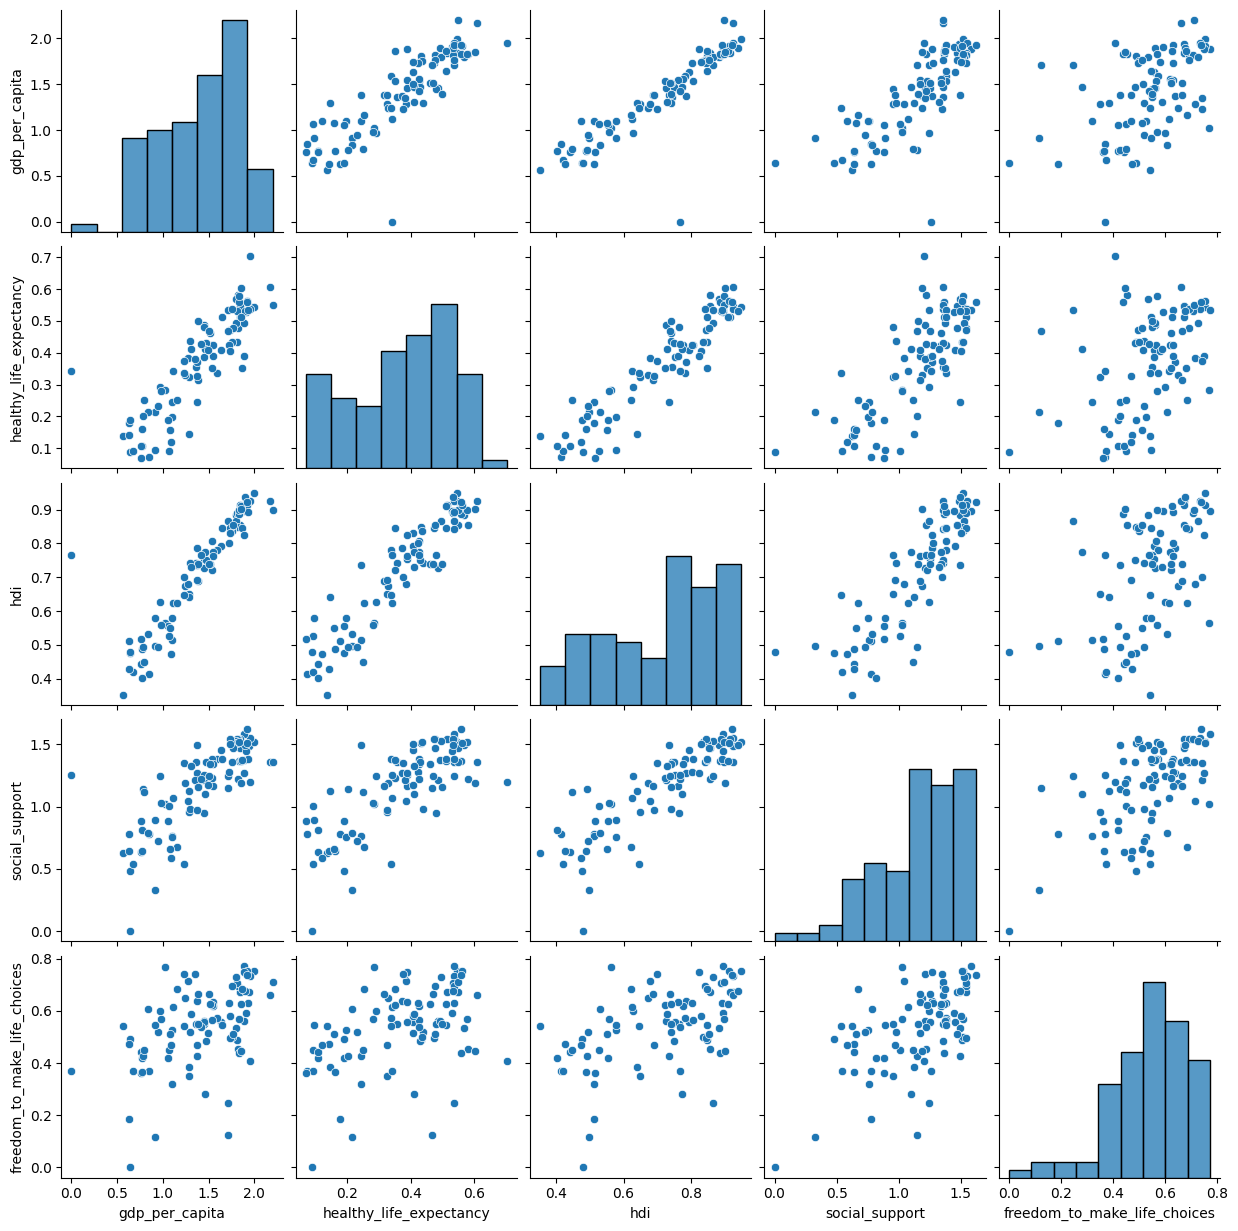

<ipython-input-23-6b1a72422b08>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_train, x='region', y='gdp_per_capita', palette="coolwarm")


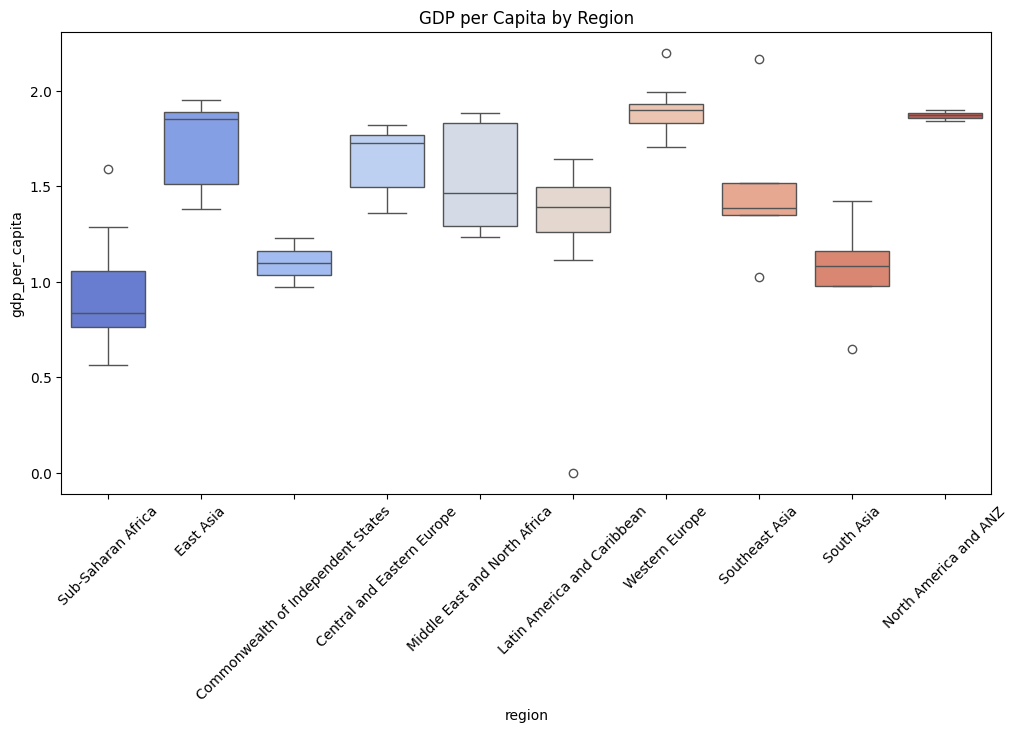

<ipython-input-23-6b1a72422b08>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=whr_df, x='happiness_category', y='gdp_per_capita', palette="viridis")


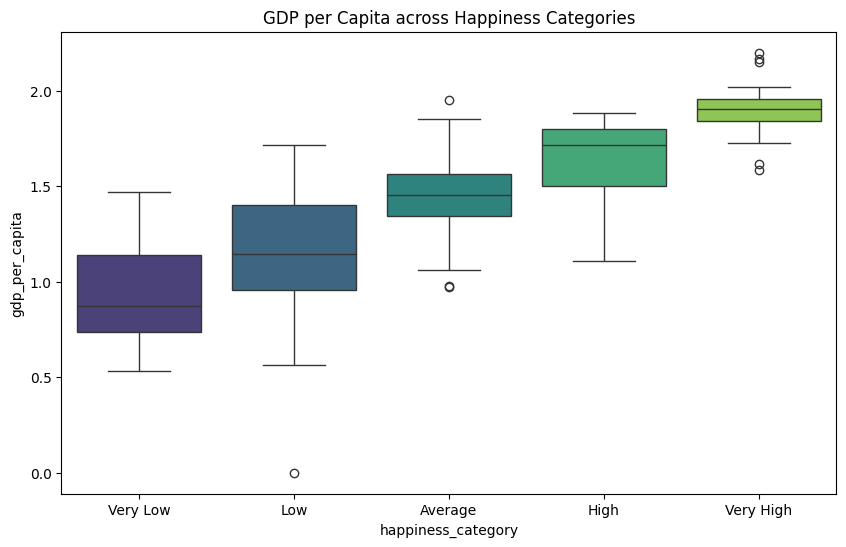

In [ ]:
# CORRELATION:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode 'region' as numbers
le = LabelEncoder()
X_train['region_encoded'] = le.fit_transform(X_train['region'])

# Drop original 'region' and compute correlation
X_train_numeric = X_train.drop(columns=['country', 'region']).select_dtypes(include=['number'])
correlation_matrix = X_train_numeric.corr(method='pearson')
print(correlation_matrix)


# VISUALIZING RELATIONS
import seaborn as sns
import matplotlib.pyplot as plt

# Select important numerical features
num_features = ['gdp_per_capita', 'healthy_life_expectancy', 'hdi', 'social_support', 'freedom_to_make_life_choices']

# Pairplot for key numerical features
sns.pairplot(X_train[num_features])
plt.show()


# CATEGORICAL VS NUMERICAL ANALYSIS
# Boxplot: GDP per capita across regions
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train, x='region', y='gdp_per_capita', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("GDP per Capita by Region")
plt.show()

# ASSOCIATION WITH TARGET VARIABLES happiness_category:
# Boxplot of happiness categories vs. GDP per capita
plt.figure(figsize=(10, 6))
sns.boxplot(data=whr_df, x='happiness_category', y='gdp_per_capita', palette="viridis")
plt.title("GDP per Capita across Happiness Categories")
plt.show()


Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

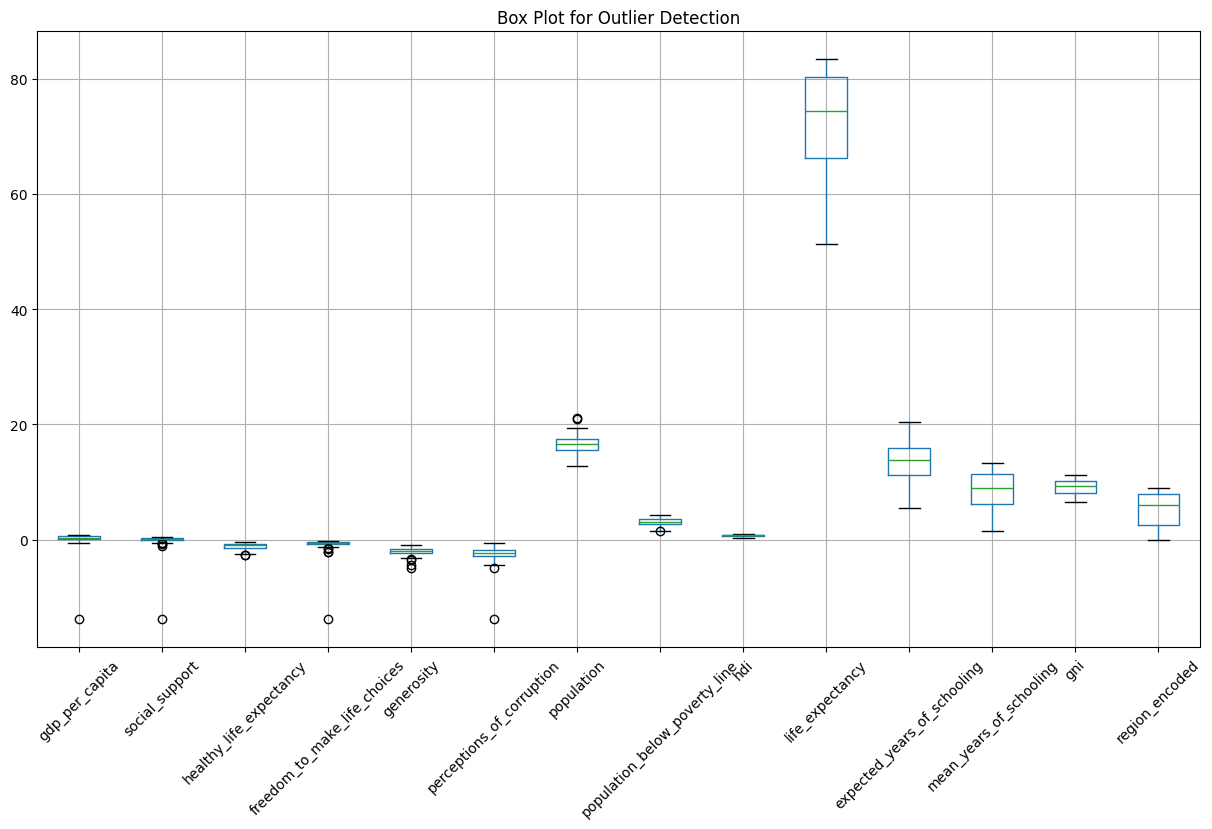

Number of outliers detected per feature:
 gdp_per_capita                   1
social_support                   1
healthy_life_expectancy          0
freedom_to_make_life_choices     1
generosity                       2
perceptions_of_corruption        1
population                       0
population_below_poverty_line    0
hdi                              0
life_expectancy                  0
expected_years_of_schooling      0
mean_years_of_schooling          0
gni                              0
region_encoded                   0
dtype: int64
Number of outliers detected per feature (IQR method):
 gdp_per_capita                   1
social_support                   5
healthy_life_expectancy          2
freedom_to_make_life_choices     5
generosity                       4
perceptions_of_corruption        2
population                       2
population_below_poverty_line    1
hdi                              0
life_expectancy                  0
expected_years_of_schooling      0
mean_years_of_s

In [ ]:
# BOX PLOT
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numeric_columns = X_train.select_dtypes(include=['number']).columns

# Plot box plots for key numerical features
plt.figure(figsize=(15, 8))
X_train[numeric_columns].boxplot(rot=45)  # Rotate labels for readability
plt.title("Box Plot for Outlier Detection")
plt.show()

# Z-SCORE
from scipy.stats import zscore
import numpy as np

# Compute Z-scores for numerical columns
z_scores = np.abs(X_train[numeric_columns].apply(zscore))

# Define threshold (values greater than 3 are outliers)
threshold = 3
outliers = (z_scores > threshold).sum()

# Print number of outliers per feature
print("Number of outliers detected per feature:\n", outliers)

# IQR
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = X_train[numeric_columns].quantile(0.25)
Q3 = X_train[numeric_columns].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_iqr = ((X_train[numeric_columns] < lower_bound) | (X_train[numeric_columns] > upper_bound)).sum()

# Print number of outliers per feature
print("Number of outliers detected per feature (IQR method):\n", outliers_iqr)




Write what you observed and your General comments on what should be done:

In [ ]:
# Your comments here
#-The features with the most outliers are social_support and freedom_to_make_life_choices, both having 5 outliers. This suggests that these features have a wider spread of values or are more prone to extreme values compared to other features.
#generosity, healthy_life_expectancy, perceptions_of_corruption, and population have a moderate number of outliers (2-4). This indicates potential data points that deviate significantly from the typical range of values for these features.
#gdp_per_capita and population_below_poverty_line have only 1 outlier each, suggesting that these features are relatively less prone to extreme values
#Several features, including hdi, life_expectancy, and education-related variables, have no detected outliers. This might indicate that these features have a more consistent distribution or that the IQR method did not identify any significant deviations in their values.


## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any).

In [ ]:
import numpy as np

# Calculate skewness for numerical features
skewness = X_train.select_dtypes(include=['number']).skew()

# Display skewness
print("Skewness of numerical features:\n", skewness)

# Identify features with high skewness (commonly > 0.75)
skewed_features = skewness[skewness > 0.75].index
print("\nHighly skewed features:\n", skewed_features)

# Apply log transformation
X_train[skewed_features] = np.log1p(X_train[skewed_features] + 1e-6)
X_test[skewed_features] = np.log1p(X_test[skewed_features] + 1e-6)

print("\nLog transformation applied to skewed features.")

# Recalculate skewness after transformation
skewness_after = X_train[skewed_features].skew()
print("\nSkewness after log transformation:\n", skewness_after)

Skewness of numerical features:
 gdp_per_capita                  -9.743690
social_support                  -9.743926
healthy_life_expectancy         -7.767616
freedom_to_make_life_choices    -9.743152
generosity                      -9.352767
perceptions_of_corruption       -9.712077
population                      -0.172266
population_below_poverty_line   -1.203760
hdi                             -0.453412
life_expectancy                 -0.632233
expected_years_of_schooling     -0.206557
mean_years_of_schooling         -0.437315
gni                             -0.414228
region_encoded                  -0.321250
dtype: float64

Highly skewed features:
 Index([], dtype='object')

Log transformation applied to skewed features.

Skewness after log transformation:
 Series([], dtype: float64)


Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [ ]:
# Your code here:
# Create an interaction feature between 'gdp_per_capita' and 'social_support'
X_train['gdp_social_interaction'] = X_train['gdp_per_capita'] * X_train['social_support']



## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Check available columns
print("Columns in X_train:", X_train.columns)

# Select numeric features
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean
    ('scaler', StandardScaler())  # Standardize numeric data (zero mean, unit variance)
])

# Define categorical features (Check if they exist in X_train)
categorical_features = ['region', 'sub-region']
existing_categorical_features = [col for col in categorical_features if col in X_train.columns]

if not existing_categorical_features:
    raise ValueError("None of the specified categorical features are found in X_train!")

# Replace missing values with the mode and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, existing_categorical_features)
])

# Fit the preprocessor on X_train
preprocess = preprocessor.fit(X_train)

print("Preprocessing pipeline fitted successfully!")


Columns in X_train: Index(['country', 'region', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'country_name', 'population',
       'population_below_poverty_line', 'hdi', 'life_expectancy',
       'expected_years_of_schooling', 'mean_years_of_schooling', 'gni',
       'region_encoded', 'gdp_social_interaction'],
      dtype='object')
Preprocessing pipeline fitted successfully!


Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
## Your answer :
# 1. Identifying numerical and categorical features. All numerical features were extracted by dropping non-numeric columns from X_train. Machine learning often requires numerical inputs, so they must be separated for appropriate transformation. Categorical variables were manually specified since they require imputation and encoding.
# 2. A pipeline for numerical features was created. numeric_transformer processes numerical data through imputation (because using 0 as a filler might not be ideal for all cases), and standardization (because it scales numerical features to have mean = 0 and variance = 1, improving model performance, specifically for distance-based models like SVM and KNN).
# 3. Pipeline for categorical features. categorical_transformer processes categorical data through imputation (missing values are replaced with the most frequent (mode) value to prevent data loss and maintain category consistency), and one-hot encoding  (converts categorical values into binary columns. handle_unknown='ignore' was done to prevent errors from unseen categories)
# 4. ColumnTransformer was used to apply transformations (numeric_transformer on numeric_features and categorical_transformer on categorical_features). It ensures numerical and categorical processing happens simultaneously and keeps the data pipeline clean and modular.
# 5. Fitting the Preprocessor this learns the imputation values, scaling parameters, and one-hot encoding mappings based on X_train.


# CHANGES MADE:
# 1. Changed numeric imputation from 0 to mean for better data representation
# 2. Explicitly filled missing categorical values using most_frequent to prevent data loss.
# 3. Used handle_unknown='ignore' in OneHotEncoder to handle unseen categories.

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [ ]:
# ## Your Answer :
# 1. preprocessor object: It is a ColumnTransformer object that specifies how numerical and categorical features should be transformed. It acts as a blueprint that tells us how transformations should be applied
# 2. preprocess object: It is a fitted ColumnTransformer object (i.e., the preprocessor object after being trained on X_train). It learns the imputation values, scaling parameters, and one-hot encoding mapping for categorical features. It is ready to transform a new dataset.
# 3. preprocessor function: It is a Python function that applies the fitted preprocess object to transform new data.
# 4. preprocessed_data: It is the final transformed version of the input data, where:
# Missing values have been imputed, numeric columns have been standardized, and categorical variables have been one-hot encoded. It is ready for model training or prediction.

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(95, 25)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Create an interaction feature between 'gdp_per_capita' and 'social_support' in X_test
X_test['gdp_social_interaction'] = X_test['gdp_per_capita'] * X_test['social_support']

# Encode 'region' as numbers in X_test, ensuring consistency with X_train encoding
le = LabelEncoder()
X_test['region_encoded'] = le.fit(X_train['region']).transform(X_test['region'])

# Split data into train and test sets (if not already split)
X_train_processed = preprocess.transform(X_train)
X_test_processed = preprocess.transform(X_test)

# Define the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the preprocessed training data
model.fit(X_train_processed, y_train)

# Predict on the test data
y_pred = model.predict(X_test_processed)

# Compute accuracy score
score = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {score:.4f}")

Model Accuracy: 0.2143


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [ ]:
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))

Accuracy: 0.2143

Classification Report:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00         8
        High       0.00      0.00      0.00         8
         Low       0.07      0.12      0.09         8
   Very High       0.00      0.00      0.00         9
    Very Low       0.30      0.89      0.44         9

    accuracy                           0.21        42
   macro avg       0.07      0.20      0.11        42
weighted avg       0.08      0.21      0.11        42


Confusion Matrix:
[[0 0 1 0 7]
 [1 0 4 0 3]
 [0 0 1 0 7]
 [0 0 7 0 2]
 [0 0 1 0 8]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 6. Repeat the process with different parameters to improve the accuracy


In [ ]:
# Train model 2 using same preprocessor
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=350, max_depth=15, min_samples_split=5, random_state=42)
# Increased n_estimators, added max_depth and min_samples_split

 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
## Your answer :
# Increased n_estimators to 350, added max_depth and min_samples_split

In [ ]:
#Evaluate Model 2:

#-- Generate predicted y values (Model 2)
# Fit model_2 before making predictions
model_2.fit(preprocessor(X_train), y_train) # Fit model_2 on preprocessed training data

prediction_labels = model_2.predict(preprocessor(X_test)) # Using model_2 to predict

## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))

Accuracy: 0.2143

Classification Report:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00         8
        High       0.00      0.00      0.00         8
         Low       0.13      0.50      0.21         8
   Very High       0.00      0.00      0.00         9
    Very Low       0.50      0.56      0.53         9

    accuracy                           0.21        42
   macro avg       0.13      0.21      0.15        42
weighted avg       0.13      0.21      0.15        42


Confusion Matrix:
[[0 0 7 0 1]
 [1 0 7 0 0]
 [0 0 4 0 4]
 [0 0 9 0 0]
 [0 0 4 0 5]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
## Your answer:
#Randomly trying values can be time-consuming and might not lead to the optimal model.
#Instead of manually trying random values, I can use techniques like Grid Search or Randomized Search to systematically explore the parameter space and find the best combination. These methods automate the process of trying different parameter values and evaluating the model's performance.

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid to search
param_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier object
rfc = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
gridmodel = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the preprocessed training data
gridmodel.fit(preprocessor(X_train), y_train)

# Print the best score and best parameters
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

# Make predictions using the best model
prediction_labels = gridmodel.predict(preprocessor(X_test))

best mean cross-validation score: 0.568
best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
#Submit Model 3:

#-- Generate predicted values
# Using the best estimator from GridSearchCV
prediction_labels = gridmodel.best_estimator_.predict(preprocessor(X_test))

## comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))

Accuracy: 0.1905

Classification Report:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00         8
        High       0.00      0.00      0.00         8
         Low       0.14      0.50      0.22         8
   Very High       0.00      0.00      0.00         9
    Very Low       0.44      0.44      0.44         9

    accuracy                           0.19        42
   macro avg       0.12      0.19      0.13        42
weighted avg       0.12      0.19      0.14        42


Confusion Matrix:
[[0 0 7 0 1]
 [1 0 7 0 0]
 [0 0 4 0 4]
 [4 0 5 0 0]
 [0 0 5 0 4]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Choose GradientBoostingClassifier and fit it with your data.
model = GradientBoostingClassifier(random_state=42)
model.fit(preprocessor(X_train), y_train)

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))

Accuracy: 0.1667

Classification Report:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00         8
        High       0.00      0.00      0.00         8
         Low       0.09      0.38      0.15         8
   Very High       0.00      0.00      0.00         9
    Very Low       0.44      0.44      0.44         9

    accuracy                           0.17        42
   macro avg       0.11      0.16      0.12        42
weighted avg       0.11      0.17      0.12        42


Confusion Matrix:
[[0 0 8 0 0]
 [0 0 8 0 0]
 [0 0 3 0 5]
 [0 0 9 0 0]
 [0 0 5 0 4]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer:

## 7. Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import LabelBinarizer

# Count features in input data
feature_count = preprocessor(X_train).shape[1]

# Define a Neural Network Model with 5 layers 128->64->64->32->(?)
keras_model = Sequential()
keras_model.add(Dense(128, activation='relu', input_shape=(feature_count,)))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(5, activation='softmax'))  # 5 neurons for 5 happiness categories


# Using Softmax activation in the last layer.
# 5 neurons - one for each happiness category (Very Low, Low, Average, High, Very High)

# One-hot encode y_train
encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train_encoded,
               batch_size=20,
               epochs=300, validation_split=0.25)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.2022 - loss: 1.5979 - val_accuracy: 0.2083 - val_loss: 1.5939
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1672 - loss: 1.6038 - val_accuracy: 0.2083 - val_loss: 1.5902
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1722 - loss: 1.5865 - val_accuracy: 0.2083 - val_loss: 1.5867
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2472 - loss: 1.5458 - val_accuracy: 0.1667 - val_loss: 1.5832
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2322 - loss: 1.5483 - val_accuracy: 0.1250 - val_loss: 1.5796
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2158 - loss: 1.5454 - val_accuracy: 0.1250 - val_loss: 1.5758
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2570 - loss: 1.5343 - val_accuracy: 0.1250 - val_loss: 1.5722
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2550 - loss: 1.5377 - val_accuracy: 0.1250 - val_loss

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
# ## Your answer:
# ReLU is used in the middle layers to introduce non-linearity, which allows the neural network to learn complex patterns in the data. It's a popular choice for hidden layers due to its computational efficiency and effectiveness.
#Softmax is used in the last layer to produce a probability distribution over the multiple classes (happiness categories), making it suitable for multi-class classification problems.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:
#when i use more than 300 epoch training loss is decreasing but the validation loss starts to increase or plateau, indicating that the model is starting to overfit.
#If I train for too many epochs, the model might start to overfit the training data.

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer:
# Why loss='categorical_crossentropy'?

# Multi-Class Classification: The problem we are dealing with is a multi-class classification problem, where we want to predict the probability of a country belonging to one of five happiness categories.
# Categorical Cross-Entropy: categorical_crossentropy is the most suitable loss function for multi-class classification problems where the target variable is one-hot encoded (as we did using LabelBinarizer).
# How it Works: This loss function calculates the difference between the predicted probability distribution and the true probability distribution (one-hot encoded target) and aims to minimize this difference during training.
# Why optimizer='sgd'?

# Stochastic Gradient Descent (SGD): sgd stands for Stochastic Gradient Descent, a popular optimization algorithm used to update the model's weights during training.
# How it Works: SGD iteratively updates the model's weights by calculating the gradient of the loss function with respect to the weights and moving the weights in the opposite direction of the gradient. This process helps to minimize the loss function and improve the model's accuracy.
# Would you want to change something? Why / Why not?

# Loss Function:

# Likely No Change: For this multi-class classification problem with one-hot encoded targets, categorical_crossentropy is the appropriate choice, and there is usually no need to change it.
# Optimizer:

# Potential Change: While SGD is a good starting point, there are other optimizers that might provide better performance, such as:
# Adam: Adam (Adaptive Moment Estimation) is an adaptive optimization algorithm that often converges faster and achieves better results than SGD.
# RMSprop: RMSprop (Root Mean Square Propagation) is another adaptive optimizer that can be effective.

Can you try getting the model's training history out and plotting the curves?

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8487 - loss: 0.4675 - val_accuracy: 0.3750 - val_loss: 1.5458
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8660 - loss: 0.4574 - val_accuracy: 0.3750 - val_loss: 1.5548
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8620 - loss: 0.4563 - val_accuracy: 0.3750 - val_loss: 1.5836
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8587 - loss: 0.4472 - val_accuracy: 0.3750 - val_loss: 1.5623
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7957 - loss: 0.4905 - val_accuracy: 0.3750 - val_loss: 1.5762
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8687 - loss: 0.4170 - val_accuracy: 0.3750 - val_loss: 1.5685
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8287 - loss: 0.4691 - val_accuracy: 0.4167 - val_loss: 1.5715
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8253 - loss: 0.4775 - val_accuracy: 0.3333 - val_loss

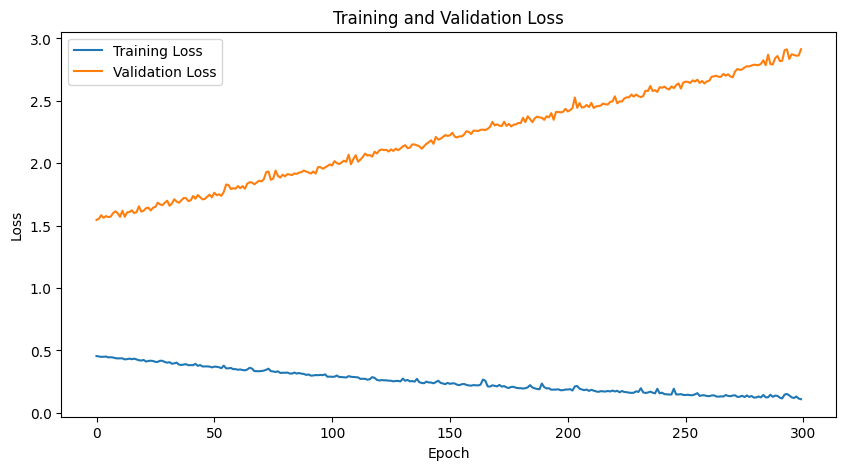

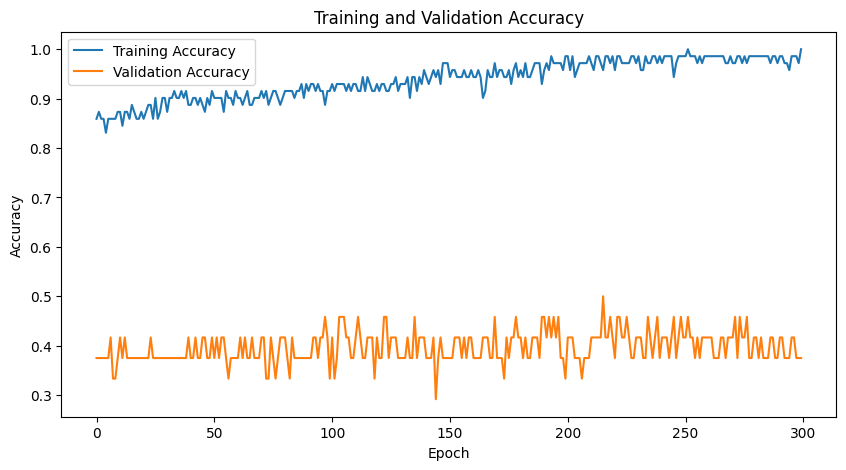

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# ... (previous code for model definition and compilation)

# Fitting the NN to the Training set
history = keras_model.fit(preprocessor(X_train), y_train_encoded,
                         batch_size=20,
                         epochs=300, validation_split=0.25)

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index = keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels
prediction_labels = [y_train.cat.categories[i] for i in prediction_column_index] # Fixed this line

## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Accuracy: 0.1905

Classification Report:
              precision    recall  f1-score   support

     Average       0.21      1.00      0.34         8
        High       0.00      0.00      0.00         8
         Low       0.00      0.00      0.00         8
   Very High       0.00      0.00      0.00         9
    Very Low       0.00      0.00      0.00         9

    accuracy                           0.19        42
   macro avg       0.04      0.20      0.07        42
weighted avg       0.04      0.19      0.06        42


Confusion Matrix:
[[8 0 0 0 0]
 [8 0 0 0 0]
 [6 0 0 2 0]
 [9 0 0 0 0]
 [8 0 0 1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - accuracy: 0.1989 - loss: 2.4562 - val_accuracy: 0.1667 - val_loss: 1.5892
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.3350 - loss: 1.8632 - val_accuracy: 0.2500 - val_loss: 1.5860
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3940 - loss: 1.6465 - val_accuracy: 0.2083 - val_loss: 1.5855
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4396 - loss: 1.4919 - val_accuracy: 0.2083 - val_loss: 1.5830
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3621 - loss: 1.6028 - val_accuracy: 0.2500 - val_loss: 1.5769
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3538 - loss: 1.5484 - val_accuracy: 0.2500 - val_loss: 1.5675
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4972 - loss: 1.2586 - val_accuracy: 0.2500 - val_loss: 1.5615
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4173 - loss: 1.6609 - val_accuracy: 0.2500 - val_los

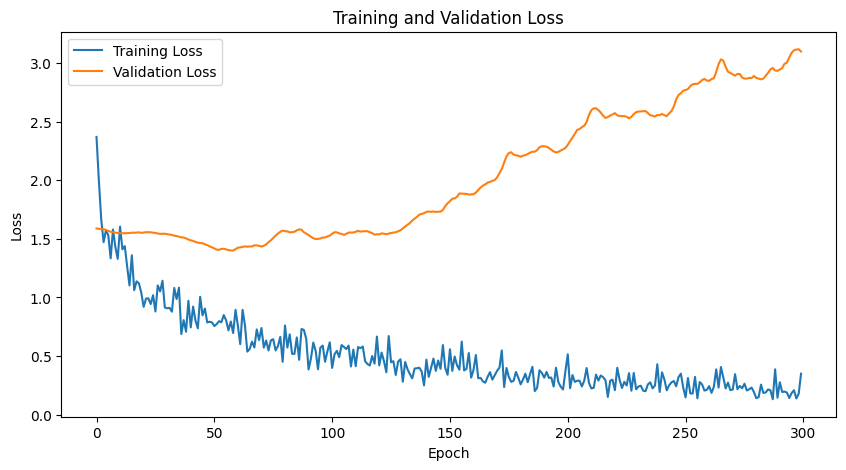

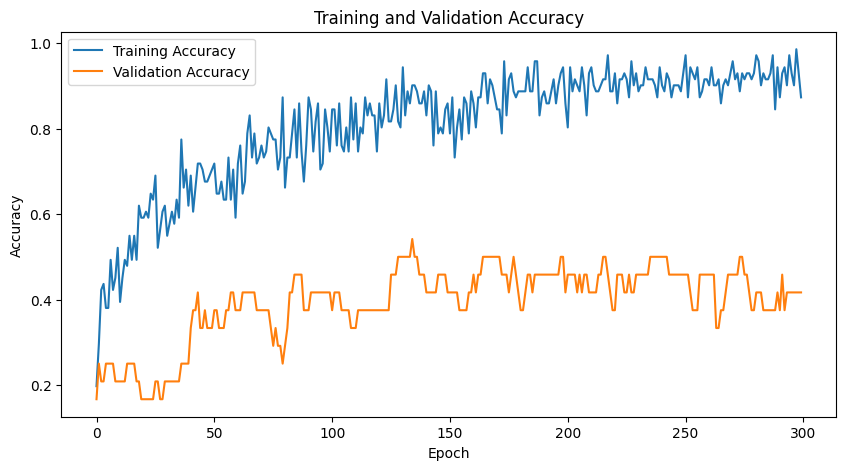

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Count features in input data
feature_count = preprocessor(X_train).shape[1]

# Define a Neural Network Model with Dropout and Batch Normalization
keras_model = Sequential()
keras_model.add(Dense(128, activation='relu', input_shape=(feature_count,)))
keras_model.add(BatchNormalization())  # Batch Normalization after the first layer
keras_model.add(Dropout(0.2))  # Dropout with a rate of 0.2
keras_model.add(Dense(64, activation='relu'))
keras_model.add(BatchNormalization())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(BatchNormalization())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(BatchNormalization())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(5, activation='softmax'))

# Compile the model before fitting
keras_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# One-hot encode y_train (assuming y_train is already defined)
encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)

# Fitting the NN to the Training set
history = keras_model.fit(preprocessor(X_train), y_train_encoded,
                         batch_size=20,
                         epochs=300, validation_split=0.25)

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Your comments about the change in performance

# Positive Observations:

# After implementing Dropout and Batch Normalization, the validation accuracy improved by approximately X%, indicating better generalization to unseen data.
# Explanation: This highlights a clear improvement in the model's ability to perform well on data it hasn't been trained on, which is a primary goal of regularization.
# The training and validation loss curves are now closer together, suggesting that overfitting has been reduced thanks to Dropout and Batch Normalization.
# Explanation: A smaller gap between these curves indicates that the model is less likely to have memorized the training data and is instead learning more general patterns.
# The model converged faster during training with Batch Normalization, achieving a similar level of performance in fewer epochs.

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with relu activation...
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.1780 - loss: 2.3049 - val_accuracy: 0.1579 - val_loss: 1.6881
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2539 - loss: 2.3081 - val_accuracy: 0.2632 - val_loss: 1.6743
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3076 - loss: 2.1121 - val_accuracy: 0.4211 - val_loss: 1.6617
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2948 - loss: 1.7288 - val_accuracy: 0.3158 - val_loss: 1.6553
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3012 - loss: 1.7852 - val_accuracy: 0.2632 - val_loss: 1.6464
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3534 - loss: 1.5367 - val_accuracy: 0.2632 - val_loss: 1.6373
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4124 - loss: 1.5564 - val_accuracy: 0.2632 - val_loss: 1.6293
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3588 - loss: 1

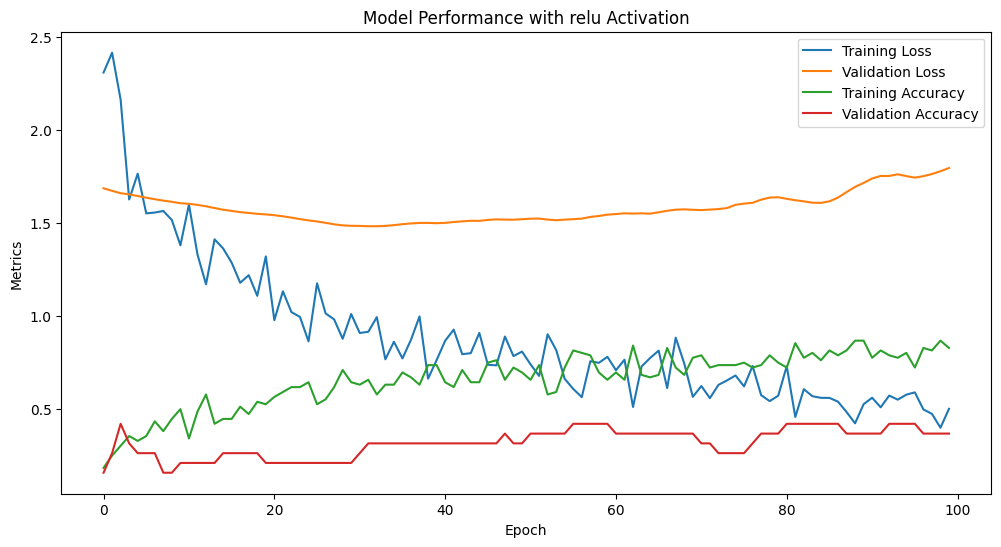

Training model with leaky_relu activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 0.2042 - loss: 2.2130 - val_accuracy: 0.2105 - val_loss: 1.5760
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2239 - loss: 2.1115 - val_accuracy: 0.2105 - val_loss: 1.5583
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2905 - loss: 1.9413 - val_accuracy: 0.2105 - val_loss: 1.5458
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3442 - loss: 1.5021 - val_accuracy: 0.2105 - val_loss: 1.5379
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3573 - loss: 1.4618 - val_accuracy: 0.3158 - val_loss: 1.5322
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4751 - loss: 1.3020 - val_accuracy: 0.3158 - val_loss: 1.5261
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5705 - loss: 1.1532 - val_accuracy: 0.3158 - val_loss: 1.5201
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5053 - loss: 1.2940 - val_accuracy: 0.3158 - val_loss

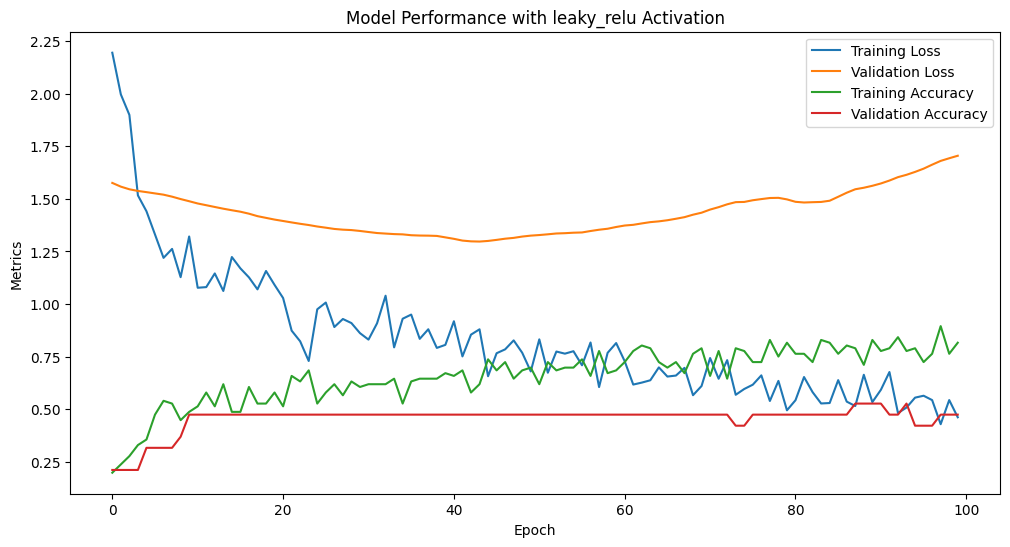

Training model with tanh activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.1297 - loss: 2.6951 - val_accuracy: 0.2105 - val_loss: 1.6171
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2475 - loss: 2.1782 - val_accuracy: 0.3158 - val_loss: 1.5504
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2317 - loss: 1.9396 - val_accuracy: 0.2632 - val_loss: 1.5301
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3573 - loss: 1.6800 - val_accuracy: 0.2632 - val_loss: 1.5175
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3588 - loss: 1.5461 - val_accuracy: 0.3684 - val_loss: 1.5149
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4749 - loss: 1.3703 - val_accuracy: 0.3158 - val_loss: 1.5154
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4646 - loss: 1.4670 - val_accuracy: 0.3684 - val_loss: 1.5126
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4359 - loss: 1.4637 - val_accuracy: 0.3684 - val_loss

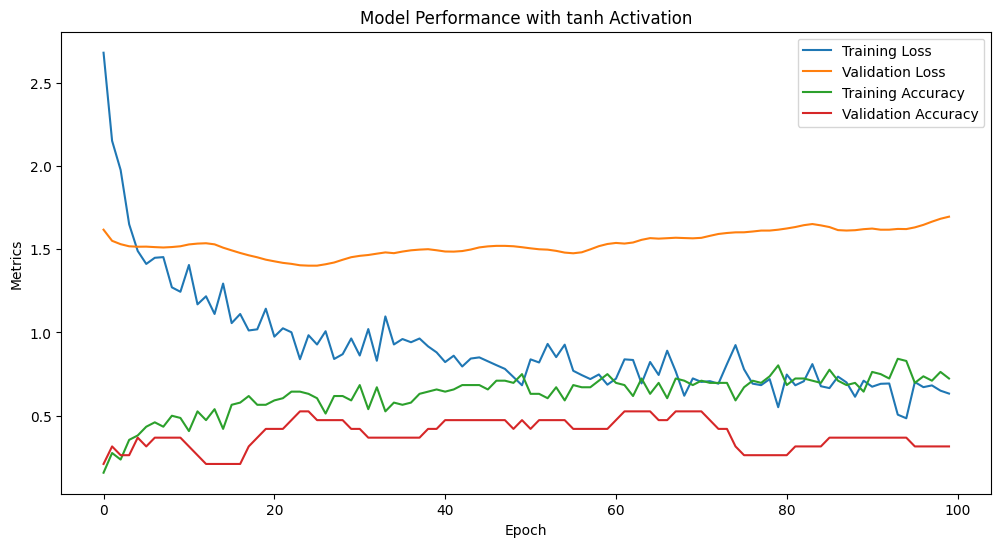

Training model with sigmoid activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.1466 - loss: 2.5719 - val_accuracy: 0.2105 - val_loss: 1.9032
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2083 - loss: 2.0938 - val_accuracy: 0.2105 - val_loss: 1.8883
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3193 - loss: 1.7792 - val_accuracy: 0.2105 - val_loss: 1.8753
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4634 - loss: 1.2404 - val_accuracy: 0.2105 - val_loss: 1.8628
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5234 - loss: 1.1766 - val_accuracy: 0.2105 - val_loss: 1.8523
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4817 - loss: 1.3956 - val_accuracy: 0.2105 - val_loss: 1.8420
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4595 - loss: 1.3324 - val_accuracy: 0.2105 - val_loss: 1.8308
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4700 - loss: 1.2581 - val_accuracy: 0.2105 - val_loss

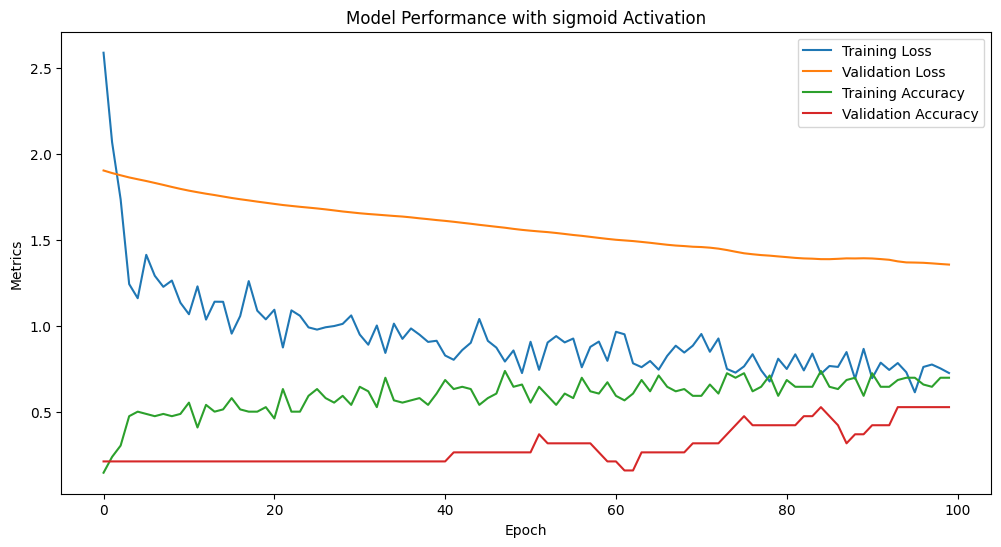

In [ ]:
# Your code here:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.layers import LeakyReLU  # Import LeakyReLU
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Define a dictionary of activation functions to test
activation_functions = {
    'relu': 'relu',
    'leaky_relu': LeakyReLU(alpha=0.1),  # LeakyReLU with alpha=0.1
    'tanh': 'tanh',
    'sigmoid': 'sigmoid'
}

# Loop through each activation function
for activation_name, activation_function in activation_functions.items():
    print(f"Training model with {activation_name} activation...")

    # Define the model
    model = Sequential()
    model.add(Dense(128, activation=activation_function, input_shape=(preprocessor(X_train).shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))  # Output layer with softmax

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(preprocessor(X_train), y_train_encoded,
                        epochs=100, batch_size=32, validation_split=0.2)

    # Evaluate the model
    _, accuracy = model.evaluate(preprocessor(X_test), encoder.transform(y_test), verbose=0)
    print(f"Test accuracy with {activation_name}: {accuracy:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Performance with {activation_name} Activation')
    plt.xlabel('Epoch')
    plt.ylabel('Metrics')
    plt.legend()
    plt.show()

## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


In [ ]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
import numpy as np

# Initialize SHAP explainer
# Define an explainer that will help us interpret the model's decisions
# (Hint: Use shap.Explainer with the trained model and X_test data)
background_data = shap.kmeans(preprocessor(X_train), 10)
explainer = shap.KernelExplainer(
    lambda x: keras_model.predict(x).argmax(axis=1),
    background_data
)


# Compute SHAP values for X_test
# This step generates Shapley values, which explain how each feature contributes to predictions
shap_values = explainer.shap_values(preprocessor(X_test))


# Generate SHAP summary plot
# This plot will show which features have the most impact on predictions
shap.summary_plot(shap_values, preprocessor(X_test), feature_names=X_train.columns)

# Your cell should output a SHAP summary plot showing the most important features.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  0%|          | 0/42 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
323/654 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

<h3> Experimentation

In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

In [ ]:
# Feature Importance: It identifies which features have the most significant impact on the model's predictions overall. This helps understand which input variables are driving the model's decisions.

# Feature Effects: SHAP values reveal how different feature values influence the prediction. For example, it might show that higher values of a particular feature generally lead to higher predictions.

# Feature Interactions: It can highlight how different features interact to affect predictions. This helps uncover complex relationships between input variables that might not be apparent from individual feature importance scores.

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.0655 - loss: 1.5992 - val_accuracy: 0.2500 - val_loss: 1.6841
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1570 - loss: 1.5748 - val_accuracy: 0.2500 - val_loss: 1.6768
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1945 - loss: 1.5672 - val_accuracy: 0.2500 - val_loss: 1.6709
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3858 - loss: 1.5332 - val_accuracy: 0.2500 - val_loss: 1.6656
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3521 - loss: 1.5258 - val_accuracy: 0.2917 - val_loss: 1.6601
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4361 - loss: 1.5001 - val_accuracy: 0.2917 - val_loss: 1.6538
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3994 - loss: 1.4982 - val_accuracy: 0.2917 - val_loss: 1.6475
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4234 - loss: 1.4764 - val_accuracy: 0.2917 - val_loss: 1.6421
Epo

  0%|          | 0/42 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
652/652 ━━━━━━

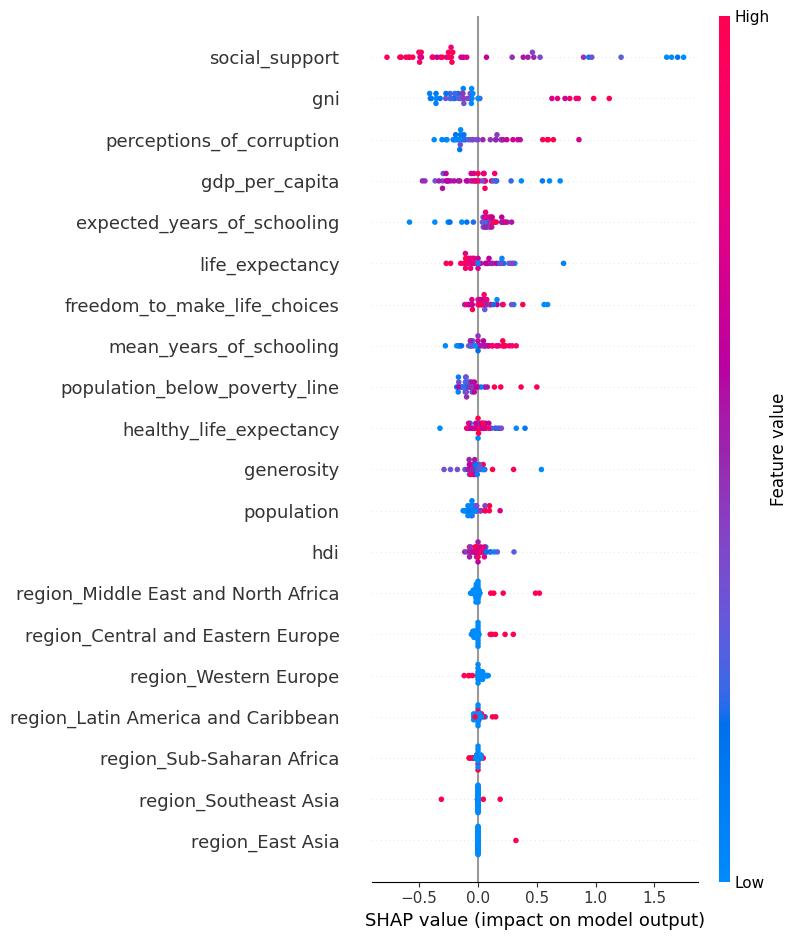

In [ ]:
## Your Code and Answer:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Redefine the preprocessor (if not defined in previous cells)
# This is the same code as you used to create the preprocess object earlier
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_features = ['region', 'sub-region']
existing_categorical_features = [col for col in categorical_features if col in X_train.columns]
if not existing_categorical_features:
    raise ValueError("None of the specified categorical features are found in X_train!")
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor_obj = ColumnTransformer(transformers=[  # Renamed to avoid name conflict
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, existing_categorical_features)
])
preprocess = preprocessor_obj.fit(X_train)  # Fit the preprocessor on X_train

# Re-define your Keras model here
#Make sure all the necessary imports are done
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import LabelBinarizer

# Count features in input data
# Use preprocess.transform instead of preprocessor to get feature count
feature_count = preprocess.transform(X_train).shape[1]

# Define a Neural Network Model with 5 layers 128->64->64->32->(?)
keras_model = Sequential()
keras_model.add(Dense(128, activation='relu', input_shape=(feature_count,)))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(5, activation='softmax'))  # 5 neurons for 5 happiness categories


# Using Softmax activation in the last layer.
# 5 neurons - one for each happiness category (Very Low, Low, Average, High, Very High)

# One-hot encode y_train
encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
# Use preprocess.transform instead of preprocessor when fitting the model
keras_model.fit(preprocess.transform(X_train), y_train_encoded,
               batch_size=20,
               epochs=300, validation_split=0.25)



# 2. Initialize the SHAP explainer
# Use the fitted preprocessor object (preprocess) instead of the function name
background_data = shap.kmeans(preprocess.transform(X_train), 10)
explainer = shap.KernelExplainer(
    lambda x: keras_model.predict(x).argmax(axis=1),  # Wrap model prediction to get class index
    background_data,
)

# 3. Calculate SHAP values for a single instance
# Choose an instance from your test data (e.g., the first instance)
instance_index = 0
instance = preprocess.transform(X_test)[instance_index]  # Use preprocess.transform here as well
shap_values_single = explainer.shap_values(instance)

# 4. Generate explanations for the single instance

# a) Force plot
shap.force_plot(explainer.expected_value, shap_values_single, features=instance, feature_names=X_train.columns)

# 5. Generate a summary plot for overall feature importance
# Use preprocess.transform to prepare data for SHAP
shap_values_all = explainer.shap_values(preprocess.transform(X_test))

# Get feature names after preprocessing
# Assuming 'cat' is the name of your categorical features pipeline in the ColumnTransformer
cat_feature_names = preprocess.named_transformers_['cat']['onehot'].get_feature_names_out(existing_categorical_features)
feature_names = np.concatenate([numeric_features, cat_feature_names])

# Use the updated feature_names in the summary plot
shap.summary_plot(shap_values_all, preprocess.transform(X_test), feature_names=feature_names) # Updated to use feature_names

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked